# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [61]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [62]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   7057  9810     9568    1762              3293          1776
1   3366  5403    12974    4400              5977          1744
2  11594  7779    12144    3252              8035          3029

Rank of Customer 0 in freshness is 193
Rank of Customer 0 in Milk is 372
Rank of Customer 0 in Grocery is 315
Rank of Customer 0 in Frozen is 239
Rank of Customer 0 in Detergents_Paper is 309
Rank of Customer 0 in Delicatessen is 325

Rank of Customer 1 in freshness is 117
Rank of Customer 1 in Milk is 283
Rank of Customer 1 in Grocery is 360
Rank of Customer 1 in Frozen is 349
Rank of Customer 1 in Detergents_Paper is 370
Rank of Customer 1 in Delicatessen is 321

Rank of Customer 2 in freshness is 274
Rank of Customer 2 in Milk is 345
Rank of Customer 2 in Grocery is 352
Rank of Customer 2 in Frozen is 320
Rank of Customer 2 in Detergents_Paper is 401
Rank of Customer 2 in Delicatessen is 397


  Observations  are written in next cell   


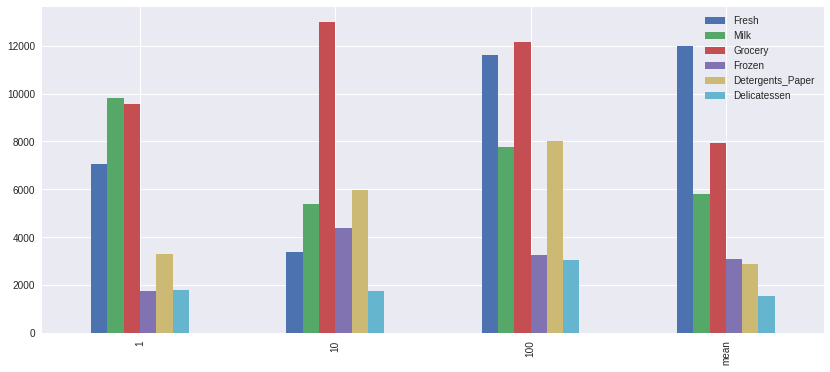

In [63]:
### TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,10,100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"

display(samples)
samples1 = pd.DataFrame(data, columns = data.keys()).reset_index(drop = True)
samples2 = samples1.sort_values(by=["Fresh"],ascending=True).reset_index(drop = True)
samples3 = samples1.sort_values(by=["Milk"],ascending=True).reset_index(drop = True)
samples4 = samples1.sort_values(by=["Grocery"],ascending=True).reset_index(drop = True)
samples5 = samples1.sort_values(by=["Frozen"],ascending=True).reset_index(drop = True)
samples6 = samples1.sort_values(by=["Detergents_Paper"],ascending=True).reset_index(drop = True)
samples7 = samples1.sort_values(by=["Delicatessen"],ascending=True).reset_index(drop = True)

columns = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]


print "Rank of Customer 0 in freshness is %d" % ( samples2[samples2.Fresh == samples1.iloc[1]["Fresh"]].index.tolist()[0])
print "Rank of Customer 0 in Milk is %d" % ( samples3[samples3.Milk == samples1.iloc[1]["Milk"]].index.tolist()[0])
print "Rank of Customer 0 in Grocery is %d" % ( samples4[samples4.Grocery == samples1.iloc[1]["Grocery"]].index.tolist()[0])
print "Rank of Customer 0 in Frozen is %d" % ( samples5[samples5.Frozen == samples1.iloc[1]["Frozen"]].index.tolist()[0])
print "Rank of Customer 0 in Detergents_Paper is %d" % ( samples6[samples6.Detergents_Paper == 
                                                      samples1.iloc[1]["Detergents_Paper"]].index.tolist()[0])
print "Rank of Customer 0 in Delicatessen is %d" % ( samples7[samples7.Delicatessen == 
                                                         samples1.iloc[1]["Delicatessen"]].index.tolist()[0])
print ""

print "Rank of Customer 1 in freshness is %d" % ( samples2[samples2.Fresh == samples1.iloc[10]["Fresh"]].index.tolist()[0])
print "Rank of Customer 1 in Milk is %d" % ( samples3[samples3.Milk == samples1.iloc[10]["Milk"]].index.tolist()[0])
print "Rank of Customer 1 in Grocery is %d" % ( samples4[samples4.Grocery == samples1.iloc[10]["Grocery"]].index.tolist()[0])
print "Rank of Customer 1 in Frozen is %d" % ( samples5[samples5.Frozen == samples1.iloc[10]["Frozen"]].index.tolist()[0])
print "Rank of Customer 1 in Detergents_Paper is %d" % ( samples6[samples6.Detergents_Paper == 
                                                      samples1.iloc[10]["Detergents_Paper"]].index.tolist()[0])
print "Rank of Customer 1 in Delicatessen is %d" % ( samples7[samples7.Delicatessen == 
                                                         samples1.iloc[10]["Delicatessen"]].index.tolist()[0])
print ""
print "Rank of Customer 2 in freshness is %d" % ( samples2[samples2.Fresh == samples1.iloc[100]["Fresh"]].index.tolist()[0])
print "Rank of Customer 2 in Milk is %d" % ( samples3[samples3.Milk == samples1.iloc[100]["Milk"]].index.tolist()[0])
print "Rank of Customer 2 in Grocery is %d" % ( samples4[samples4.Grocery == samples1.iloc[100]["Grocery"]].index.tolist()[0])
print "Rank of Customer 2 in Frozen is %d" % ( samples5[samples5.Frozen == samples1.iloc[100]["Frozen"]].index.tolist()[0])
print "Rank of Customer 2 in Detergents_Paper is %d" % ( samples6[samples6.Detergents_Paper == 
                                                      samples1.iloc[100]["Detergents_Paper"]].index.tolist()[0])
print "Rank of Customer 2 in Delicatessen is %d" % ( samples7[samples7.Delicatessen == 
                                                         samples1.iloc[100]["Delicatessen"]].index.tolist()[0])
print ""



import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

print ""

print "  Observations  are written in next cell   "


**Freshness**
- Customer 0 < Customer 1 < Customer 2 
- Customer 2 is a replica of average customer, where as customer 0 isn't much worried about freshness of the product, whereas cutomer 1 preference is not freshness of the product.

**Milk**
- Customer 1 < Customer 2 < Customer 1
- Customer 2 is a replica of average customer, where as customer 0 and 1 uses milk more than an average customer.

**Grocery**
- Customer 0 < Customer 2 < Customer 1
- All three customers buys groceries more than an average customer. Customer 0 lies around 70th percentile, where customer 1 and customer 2 lies around 90 / 85 th percentile, which indicates they purchase groceries much more than an average customer.

**Frozen**
- Customer 0 < Customer 2 < Customer 1
- Customer 2 is a replica of average customer, where as customer 0 stands at 55th percentile (approx half of the customers purchase less then customer 0). Customer 1 stands at 75th percentile. (approx 3/4 of customers buy less than cusstomer 1)

**Detergents_Paper**
- Customer 0 < Customer 1 < Customer 2
- All three customers buys detergents_paper more than an average customer. Customer 0 lies around 70th percentile, where customer 1 and customer 2 lies around 90 / 95 th percentile, which indicates they purchase detergents_paper much more than an average customer.

**Delicatessen**
- Customer 0 == Customer 1 < Customer 2
- Customer 0 /1  is a replica of above average customer, where they stand at approximately 75th percentile (approx 3/4 of the customers purchase less then customer 0 /1 ). Customer 2 stands at 90th percentile. (approx 9/10 of customers buy less than cusstomer 2)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
**Rank**
Value - ranges from 0 - 439. Higher rank customer pruchases more products of respective category.

*Customer 0 *:-

Rank of Customer 0 in freshness is 193:
Rank of Customer 0 in Milk is 372
Rank of Customer 0 in Grocery is 315
Rank of Customer 0 in Frozen is 239
Rank of Customer 0 in Detergents_Paper is 309
Rank of Customer 0 in Delicatessen is 325

Customer 0 isn't picky about freshness, but purchases other products more than an average customer. When compared to an average customer he can described as a retail customer.

Rank of Customer 1 in freshness is 117
Rank of Customer 1 in Milk is 283
Rank of Customer 1 in Grocery is 360
Rank of Customer 1 in Frozen is 349
Rank of Customer 1 in Detergents_Paper is 370
Rank of Customer 1 in Delicatessen is 321

Customer 1 is not concerned about freshness, he likes more frozen / grozeries. He likes shops where there are more frozen food is available. Might be coffee / retail customer.

Rank of Customer 2 in freshness is 274
Rank of Customer 2 in Milk is 345
Rank of Customer 2 in Grocery is 352
Rank of Customer 2 in Frozen is 320
Rank of Customer 2 in Detergents_Paper is 401
Rank of Customer 2 in Delicatessen is 397

Customer 2 cares about freshness of a product, He spends more on all categories when compared to an average customer.  Might be a grocery market or retail customer.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [64]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
data_with_grocery = data
data_only_grocery = data['Grocery']
data_without_grocery = data_with_grocery.drop(['Grocery'], axis = 1)
new_data = pd.DataFrame(data_without_grocery)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data_only_grocery, test_size=0.25,random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(max_depth=4,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
#After calculating each feature score, following scores are reported
score_fresh = -0.192424
score_milk = 0.431992
score_grocery = 0.722092
score_frozen = 0.138701684746
score_detergents_paper= 0.578558017871
score_delicatessen = -0.861635423216
print "score for Milk with max-depth 4 is    %f" % score_milk
print "score for Fresh with max-depth 4 is   %f " %score_fresh
print "score for Grocery with max-depth 4 is %f " %score_grocery
print "score for Frozen with max-depth 4 is  %f " %score_frozen
print "score for Detergents_Paper with max-depth 4 is  %f " %score_detergents_paper
print "score for Delicatessen with max-depth 4 is  %f " %score_delicatessen

print "R^2 value of groceries is %f" % r2_score(y_test, y_pred) 

score for Milk with max-depth 4 is    0.431992
score for Fresh with max-depth 4 is   -0.192424 
score for Grocery with max-depth 4 is 0.722092 
score for Frozen with max-depth 4 is  0.138702 
score for Detergents_Paper with max-depth 4 is  0.578558 
score for Delicatessen with max-depth 4 is  -0.861635 
R^2 value of groceries is 0.722092


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict all the features, out of which Grocery came up with the bestscore. 
prediction score is 0.722092
R^2 value is 0.722092
Since the R^2 value is closer to 1 and above 0.5, it can implied that model fits the data correctly.

The features with highest or better prediction scores would not help in identifying customers' spending habits, since they can be directly fetched from the raw data.
In order to identify customers' spending habits I would go with following order.
Delicatessen > Fresh > Frozen > Milk > Detergents_paper > Grocery

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

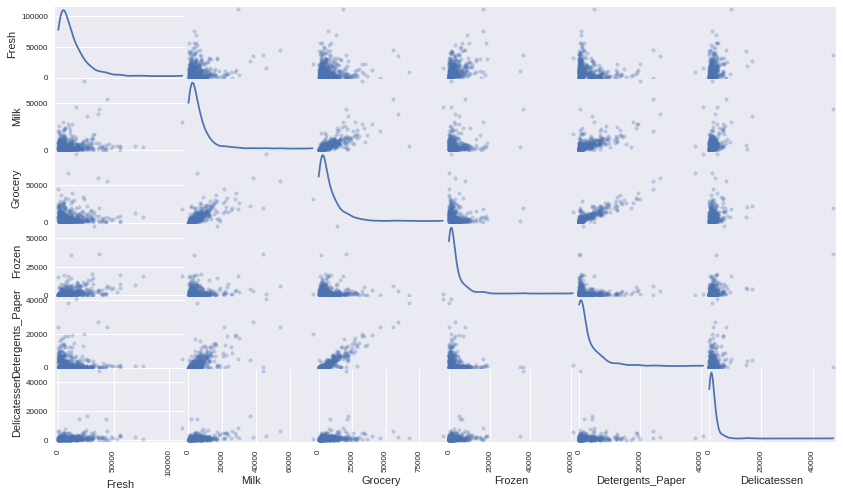

In [79]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Following pairs exhibit correlation, since the graph has slope of about 45degrees. 
Milk & Grocery, Grocery & Detergents_Paper and a bit lesser correlatin between Milk & Detergents_Paper.

Whenever there is a 45 degree slope, there will be more correlation between X and Y axis. Hence considering one of the X or Y axis should help in segmenting the customers rather than using both (redundant and leads to overfitting).

*Milk & Grocery*:
- Data is skewed to the right and more towards zero. An approx 45 degree slope is observed. 

*Grocery & Detergent_Paper*:
- Data is skewed to the right little less than Milk & Grocery. This combination approximately maintains 45 degree slope. 

*Milk & Detergent_Paper*:
- Data is skewed to the right and more data is observed closer to zero. Median value is smaller then mean since some of the data is spread to extremes in the graph. Outliers can affect the prediction capability. It is important to remove / trim the outliers before proceeding further.

With above graphs, we can safely remove one of the two features (grocery or detergent_papers) and can still attempt to predict the customer spending. This confirms the suspicion about the grocery which can be directly predicted from the data. The data is not normally distributed. The values of mean and median are not close enough for most of the features. Most of the data is closer towards the intersection of axis. In some graphs outliers can be observed which might affect the ability to predict correctly. May be the logarithmic function might help here since all the data is close zero.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

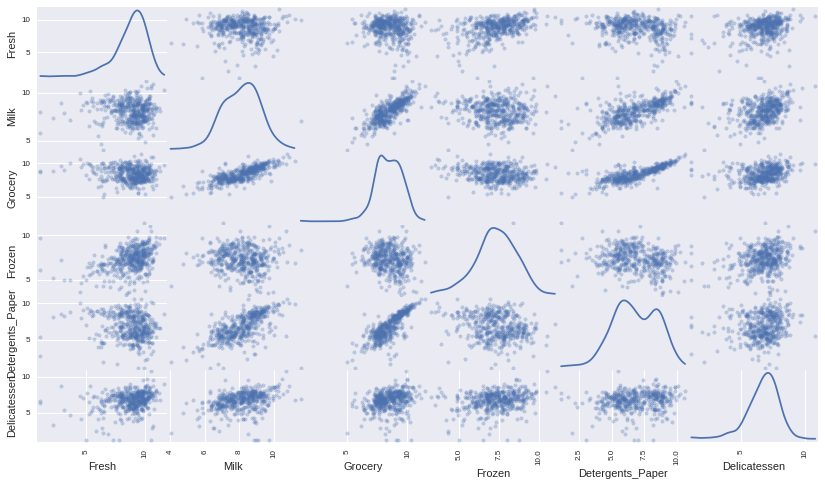

In [66]:
# TODO: Scale the data using the natural logarithm
from scipy import stats
#prob = stats.probplot(data, dist=stats.norm, plot=ax1)
log_data = np.log(data) #None

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [67]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
1  8.121480  8.594710  9.470703  8.389360          8.695674      7.463937
2  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [68]:
# For each feature find the data points with extreme high or low values
import collections
outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    array = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values
    for i in array:
        outliers.append(i)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

len_bad_data = (data.shape[0] - good_data.shape[0])
len_outliers = len(outliers)
print "Total bad points are %d" % len_bad_data
print "Total outliers are %d" % len_outliers
print "Duplicate outliers are %d" % (len_outliers - len_bad_data -1)
dup_outlier_indices =  [item for item, count in collections.Counter(outliers).items() if count > 1]
print "Duplicate outlier's indices are %s" % dup_outlier_indices

#reference
#http://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy


Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Total bad points are 42
Total outliers are 48
Duplicate outliers are 5
Duplicate outlier's indices are [128, 154, 65, 66, 75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Yes there are 6.
Duplicate outlier's indices are [128, 154, 65, 66, 75]

Since the outliers corrupt the prediction capability it is recommended to remove the outliers.

The total number of inputs are ~440 and the outliers are ~42. Removing 10% of the data wouldn't be a good option since we will loose so much of data. Hence only removing duplicate outliers (5) would be a better option here.  


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained variance Ratio is [ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]
Total explained variance of first and second is 0.725253 
Total explained variance of first four is 0.976745 


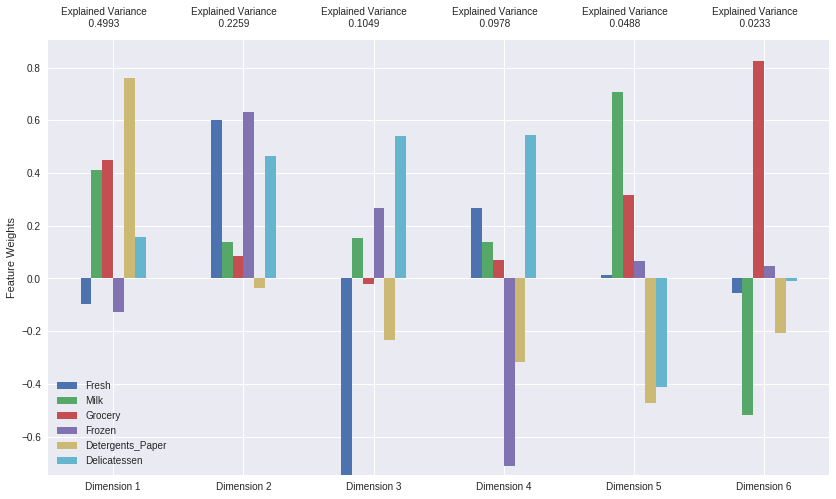

In [69]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features

pca = PCA(n_components=len(good_data.keys()))

pca.fit(good_data)
print "Explained variance Ratio is %s" %(pca.explained_variance_ratio_) 

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

explained_variance_first_second = 0
for i in range(0,2):
    explained_variance_first_second += pca.explained_variance_ratio_[i]
print "Total explained variance of first and second is %f " % explained_variance_first_second

explained_variance_firstfour = 0
for i in range(0,5):
    explained_variance_firstfour += pca.explained_variance_ratio_[i]
print "Total explained variance of first four is %f " % explained_variance_firstfour

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Example:- More weight for a feature A, feature B in X PCA indicates that In X PCA an increase in the value of feature A correlates to increase in the value of feature B.

Total explained variance of first and second is 0.725253. Considering 6 features this value is good.

Total explained variance of first four is 0.976745. This is a very good value, which explains that with first forr PCA we could segregate the customers. 

**First principal component**
- It is strongly correlated to Detergents_paper / Grocery / Milk / Delicatessan
- It increases with increase in values of Detergents_paper / Grocery
- It can be viewed as a measure of quality for Detergents_paper / Grocery / Milk
- The high correlation of Detergents_paper indicates that following the first PCA would result in customer who purchase more Detergents_paper
- He might be a retail customer 

**Second principal component**
- It is strongly correlated to Fresh / Frozen / Delicatessan
- It increases with increase in values of Fresh / Frozen / Delicatessan
- It can be viewed as a measure of quality for Fresh / Frozen / Delicatessan
- The high correlation of Fresh / Frozen indicates that following the second PCA would result in customer who purchase more Fresh & Frozen products
- He might be a restaurant customer 

**Third principal component**
- It is strongly correlated to Freshness / Delicatessan
- It increases with decrease in values of Freshness and increase in value of Delicatessan
- It can be viewed as a measure of low quality for Freshness and good quality for Delicatessan
- The high correlation of Freshness indicates that following the third PCA would result in customer who prefers product that are not fresh
- He vaguely might be a hotel customer

**Fourth principal component**
- It is strongly correlated to Frozen / Delicatessan / Milk
- It increases with decrease in values of Frozen and increase in value of Delicatessan
- It can be viewed as a measure of low quality for Frozen and good quality for Delicatessan
- The high correlation of Frozen indicates that following the fouth PCA would result in customer he prefers product that are not frozen
- He might be a coffee customer


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [70]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.8820       0.4617       0.2764       0.1055       0.0958   
1       2.1793       0.5069       0.8243      -1.0031      -0.4516   
2       2.5291       1.3485       0.1094      -0.2050      -0.5879   

   Dimension 6  
0      -0.2093  
1       0.3107  
2      -0.0808

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [71]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples =  pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [72]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.8820       0.4617
1       2.1793       0.5069
2       2.5291       1.3485

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

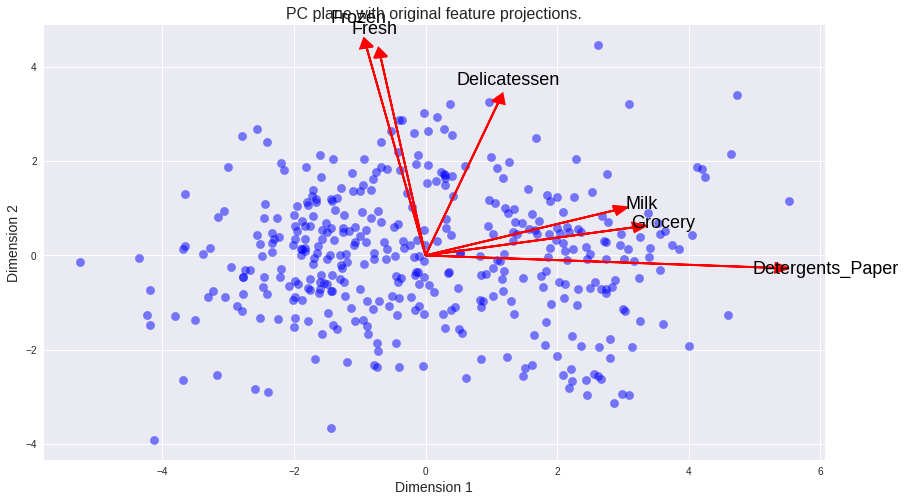

In [73]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


*My Observations*:-
Detergents / Milk/ grocery are strongly correlated. 
Freshness / Frozen are strongly correlated and both together can be easily correlated to delicatessen.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means clustering algorithm**

*Properties*
   - There are always K clusters.
   - There is always at least one item in each cluster.
   - The clusters are non-hierarchical and they do not overlap.
   - Every member of a cluster is closer to its cluster than any other cluster because closeness does not always involve the 'center' of clusters.

*Advantages*
   - Low time complexity (linear) (When more variables are there, there would be significant difference)
   - Works great when the clusters are in spherical shape or evenly distributed 
   - Easy to implement and interpret 
   - K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.
    
**Gaussian Mixture Model Clustering algorithm **

*Properties*
   - GMM is a super set of K-means. k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0.

*Advantages*
   - GMM works well in case of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans.
   - GMM comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.
   


** Hard or Soft assignment**:
- Let's says we are aiming to break them into three clusters, as above. K means will start with the assumption that a given data point belongs to one cluster.
- Choose a data point. At a given point in the algorithm, we are certain that a point belongs to a X cluster. In the next iteration, we might revise that belief, and be certain that it belongs to the Y cluster.
However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment".
- What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to the red cluster, but also 10% chance its in green, 20% chance it might be blue. That's a soft assignment.
- The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments.
- As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.



There is no clear indication of which algorithm should be used as of now.I would give K-Means a try.





#References

    1. http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm
    2. https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
    3. https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,clusterer.labels_, metric='euclidean')
print "score with 2 clusters is %f" % 0.447157742293
print "score with 3 clusters is %f" % 0.36398647984
print "score with 4 clusters is %f" % 0.331150954285
print "score with 5 clusters is %f" % 0.353193403287
print "score with 6 clusters is %f" % 0.363712346094
print "score with 7 clusters is %f" % 0.355334447306
print "score with 8 clusters is %f" % 0.368991429627
print "score with 9 clusters is %f" % 0.367452867107

score with 2 clusters is 0.447158
score with 3 clusters is 0.363986
score with 4 clusters is 0.331151
score with 5 clusters is 0.353193
score with 6 clusters is 0.363712
score with 7 clusters is 0.355334
score with 8 clusters is 0.368991
score with 9 clusters is 0.367453


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

2 clusters has the best score .

    score with 2 clusters is 0.447158
    score with 3 clusters is 0.363986
    score with 4 clusters is 0.331151
    score with 5 clusters is 0.353193
    score with 6 clusters is 0.363712
    score with 7 clusters is 0.355334
    score with 8 clusters is 0.368991
    score with 9 clusters is 0.367453

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

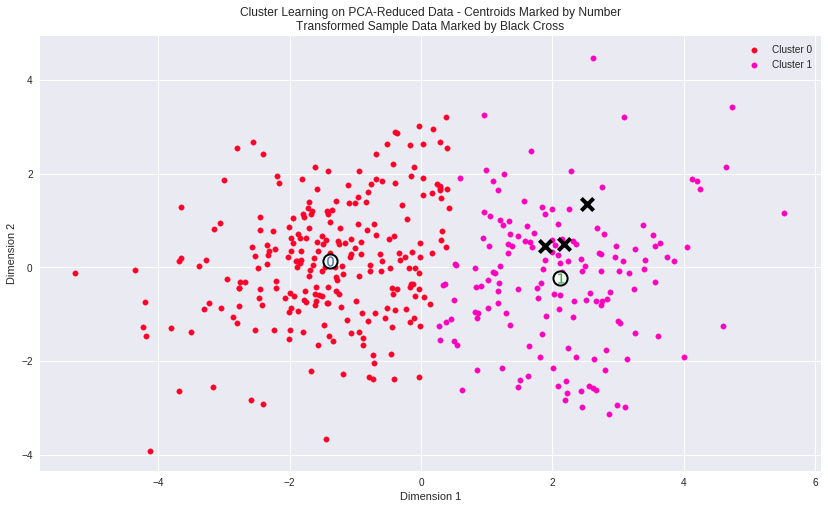

In [75]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [76]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9451.0  1938.0   2449.0  2200.0             307.0         771.0
Segment 1  5424.0  7780.0  11532.0  1123.0            4444.0        1136.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

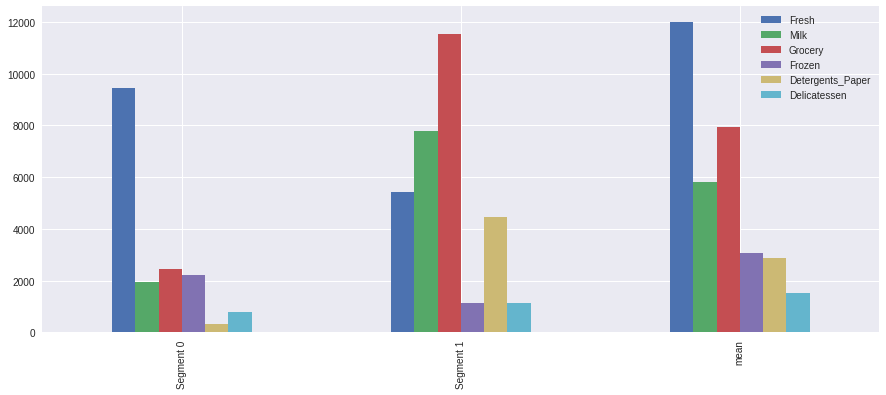

In [77]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

**Answer:**

Following are the Median values of actual product categories
Fresh - 8504 
Milk - 3627
Grocery - 4755
Frozen - 1526
Detergents_Paper - 816.5
Delicatessen - 965.5

Median separates both the segments . (Higher end of fresh / frozen in segment zero and reverse in other categories.)
Segment 0:-
Marks the higher end of freshness / frozen food. 
Lower end of Milk / Grocery / Detergents / Delicatessen

Segment 1:-
Marks the lower end of freshness / frozen food. 
Higher end of Milk / Grocery / Detergents / Delicatessen

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [53]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
print reduced_samples

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
   Dimension 1  Dimension 2
0     1.882034     0.461741
1     2.179314     0.506880
2     2.529127     1.348456


**Answer:**
All the predictions were accurate.
All the customers proved to be retail customers. In my prediction during earlier stage i thought customer 1  could be coffee/grocery customer (because of more frozen category) but the customer is more oriented towards retail / grocery. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Applying any change in delivery service to all customers is not a good idea, some of them may not like it and unsubscribe.

** Segment 0 / Cluster 0 **
- Major factors are Freshness / Frozen 
- Change in delivery service from 5 day to 3 day would adversely affect because the customer base would like to purchase fresh products

** Segment 1 / Cluster 1 **
- Major factors are Milk / Grocery / Detergent_Paper 
- Change in delivery service from 5 day to 3 day would positively affect the customer base. Cluster 1 customer base is not too picky about freshness so groceries/milk and detergent paper can be supplied on alternate days rather than on 5 days a week

**A/B Testing**
- It has to be done on same cluster group
- Dividing the same cluster in to two sets and conducting A/B testing helps in verifying if the change in delivery service model works
- Divide Cluster 1 in to two parts say A & B. Let A be control group and B be the experiment group. Apply the changed delivery service model on group B and after considerable amount of time (say 2 months), we can verify if the customer service experience has improved on group B when compared to group A.
- After A/B testing, if there is an improvement in customer service and sales, the change in delivery service should be roled on to group A. (We expect this to happen). 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Target variable would be the cluster identification. 

Supervised learning can be used here.

X_train = features of existing data

y_train = customer segments 1 and 2 (clusters)

X_test = features of the new customers

y_test = customer segment (clusters)

Using supervised algorithm, we can model the X_train, y_test and then predict the output of X_test.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

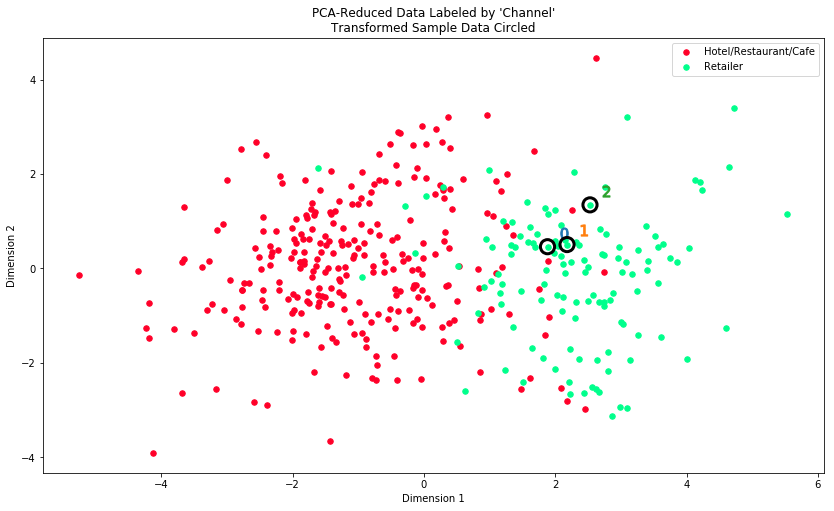

In [266]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The predictions for the samples are mostly correct. 

Before modelling, i wrongly guessed that customer 1 might be coffee / restaurant guy, but after modelling he falls in retail domain. It is an mistake in manual guess (assumption that only frozen plays a major role back fired). 

Having said that, overlap between clusters can be observed in the above figure. Still, I would say that the classification fared well enough to distinguish between two kind of customer sets. 

I would say that these classifications are cosnsistent with my previous definition of the customer segments. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.